# Crop Yield Prediction Using Machine Learning Based on Weather and Soil Parameters

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Loading Dataset
df = pd.read_csv('crop_yield_dataset.csv')
print(df.head())
print(df.info())

   Fertilizer  temp     N     P     K  yeild
0        80.0  28.0  80.0  24.0  20.0   12.0
1        77.0  27.0  78.0  23.0  20.0   12.0
2        80.0  26.0  80.0  24.0  20.0   12.0
3        80.0  28.0  80.0  24.0  20.0   12.0
4        78.0  27.0  78.0  23.0  19.0   12.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fertilizer  2596 non-null   float64
 1   temp        2596 non-null   float64
 2   N           2596 non-null   float64
 3   P           2596 non-null   float64
 4   K           2596 non-null   float64
 5   yeild       2596 non-null   float64
dtypes: float64(6)
memory usage: 121.8 KB
None


In [3]:
# Check for missing values
print(df.isnull().sum())

Fertilizer    0
temp          0
N             0
P             0
K             0
yeild         0
dtype: int64


In [4]:
# rename the column yeild to yield
df.rename(columns={"yeild": "yield"}, inplace=True)

In [5]:
print(df.head())

   Fertilizer  temp     N     P     K  yield
0        80.0  28.0  80.0  24.0  20.0   12.0
1        77.0  27.0  78.0  23.0  20.0   12.0
2        80.0  26.0  80.0  24.0  20.0   12.0
3        80.0  28.0  80.0  24.0  20.0   12.0
4        78.0  27.0  78.0  23.0  19.0   12.0


In [6]:
# Checking for duplicates
df.duplicated().head()

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [7]:
# Count total duplicates
df.duplicated().sum()

np.int64(11)

In [8]:
# displays all duplicate rows
df[df.duplicated()]

,Fertilizer,temp,N,P,K,yield
3,80.0,28.0,80.0,24.0,20.0,12.0
5,80.0,28.0,80.0,24.0,20.0,12.0
205,65.0,38.0,60.0,20.0,16.0,8.0
406,76.0,26.0,75.0,24.0,19.0,11.0
599,50.0,37.0,65.0,18.0,19.0,9.0
600,50.0,37.0,65.0,18.0,19.0,9.0
801,73.0,29.0,73.0,23.0,20.0,10.0
802,70.0,24.0,70.0,22.0,18.0,10.0
809,77.0,28.0,76.0,22.0,19.0,10.0
1001,55.0,38.0,65.0,19.0,17.0,7.0


In [9]:
# remove duplicates
df.drop_duplicates(inplace=True)

##### Now duplicates has been removed, just im checking once again my duplicates data

In [10]:
df.duplicated().head()

0    False
1    False
2    False
4    False
6    False
dtype: bool

In [11]:
# displays all duplicate rows
df[df.duplicated()]

,Fertilizer,temp,N,P,K,yield


##### No duplicate data in my dataset now

## Check for Outliers

In [12]:
import matplotlib.pyplot as plt

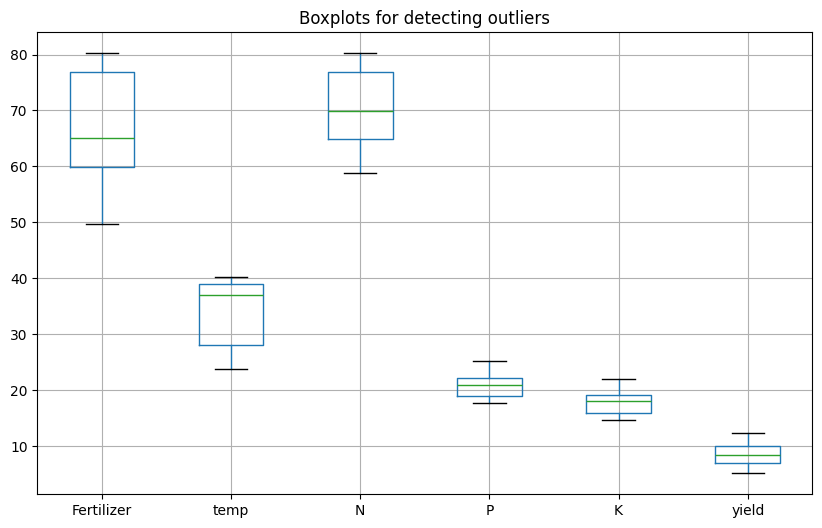

In [13]:
# plot boxplot for each numeric column
df[['Fertilizer', 'temp', 'N', 'P', 'K', 'yield']].boxplot(figsize=(10,6))
plt.title("Boxplots for detecting outliers")
plt.show()

In [14]:
# calculate z-scores
z = (df - df.mean()) / df.std()
# identify rows with outliers
outliers = df[(np.abs(z) > 3).any(axis=1)]
print(outliers)

Empty DataFrame
Columns: [Fertilizer, temp, N, P, K, yield]
Index: []


##### There is no outliers in my dataset

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [16]:
cat_cols = df.select_dtypes(include=["object"]).columns

In [19]:
cat_cols

Index([], dtype='object')

In [20]:
# Label Encoding for categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [21]:
# Feature Scaling for numeric columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

Numeric Columns: Index(['Fertilizer', 'temp', 'N', 'P', 'K', 'yield'], dtype='object')


In [23]:
# Standard Scaling (Z-score normalization: mean=0, std=1)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [24]:
df

,Fertilizer,temp,N,P,K,yield
0,1.387524,-1.090827,1.540896,1.671189,1.131662,1.790605
1,1.079513,-1.277099,1.246796,1.163759,1.131662,1.790605
2,1.387524,-1.463371,1.540896,1.671189,1.131662,1.790605
4,1.182183,-1.277099,1.246796,1.163759,0.616357,1.790605
6,0.874172,-1.463371,0.805647,0.656328,0.616357,1.790605
...,...,...,...,...,...,...
2591,1.278969,-1.274373,1.075970,1.208213,1.154441,0.938413
2592,1.292796,-1.248576,1.089109,1.198383,1.211759,1.031099
2593,1.283444,-1.070533,1.123915,1.094572,1.641746,1.049718
2594,1.274049,-1.064499,1.088740,1.200067,1.581864,0.986923


# Split Data

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop("yield", axis=1)
y = df["yield"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Example with Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [27]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 0.06240893420959492
RMSE: 0.0947945931717156
R² Score: 0.9909442527703973


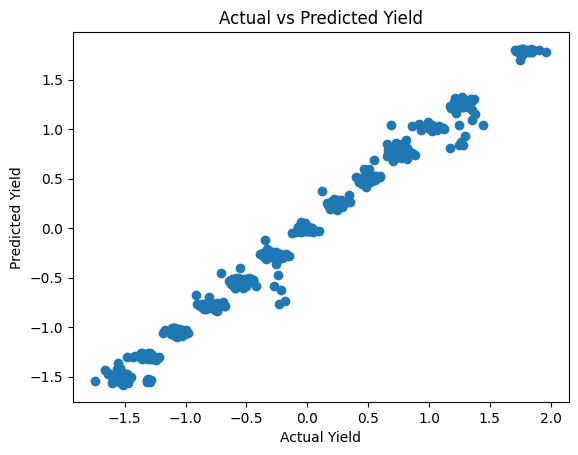

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Split features and target
X = df.drop("yield", axis=1)
y = df["yield"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results).T
print(results_df)


                        MAE      RMSE        R²
Linear Regression  0.295143  0.356906  0.871630
Decision Tree      0.076701  0.118778  0.985782
Random Forest      0.062409  0.094795  0.990944


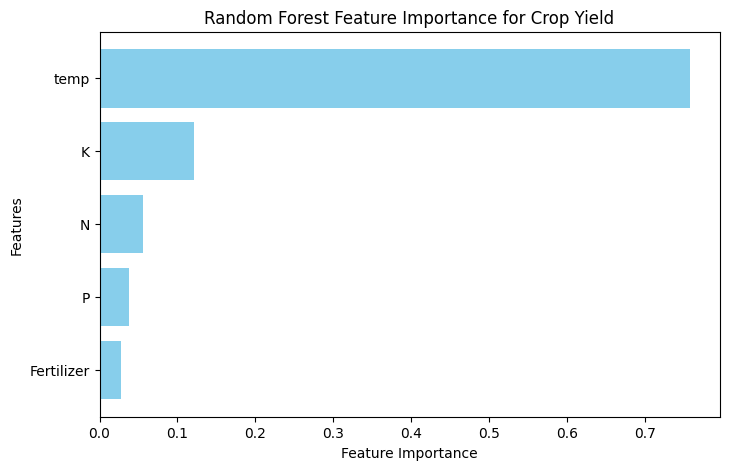

,Feature,Importance
1,temp,0.758106
4,K,0.120772
2,N,0.055213
3,P,0.038124
0,Fertilizer,0.027786


In [37]:
# Get feature importance from Random Forest
importances = model.feature_importances_
features = X.columns

# Create DataFrame for better visualization
feat_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8,5))
plt.barh(feat_importances['Feature'], feat_importances['Importance'], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance for Crop Yield")
plt.gca().invert_yaxis()
plt.show()

feat_importances

In [39]:
!git add CropYieldPrediction.ipynb

fatal: not a git repository (or any of the parent directories): .git
